## Decision Tree 



### Classification

Let's train decision tree using iris dataset for classification task

We can import this dataset from sklearn. There are 150 samples of three types of iris('setosa', 'versicolor', 'virginica') and each of them has 4 parameters


In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names


In [3]:
print(X.shape)
print(y.shape)
print(target_names)
print(feature_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's make some visualization sepal_length vs petal_length and we'll clearly see that only this two variable are enough for our classification task.

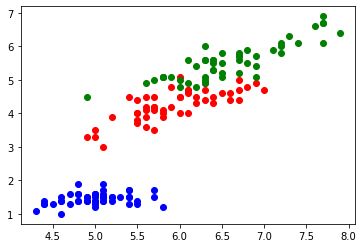

In [8]:
import matplotlib.pyplot as plt

plt.plot(   X[y==0, 0], X[y==0, 2], 'bo',
            X[y==1, 0], X[y==1, 2], 'ro',
            X[y==2, 0], X[y==2, 2], 'go')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf = 2, criterion='entropy')

dtc.fit(X_train, y_train)
print('Train score: {}\nTest score: {}'.format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Train score: 0.9714285714285714
Test score: 1.0


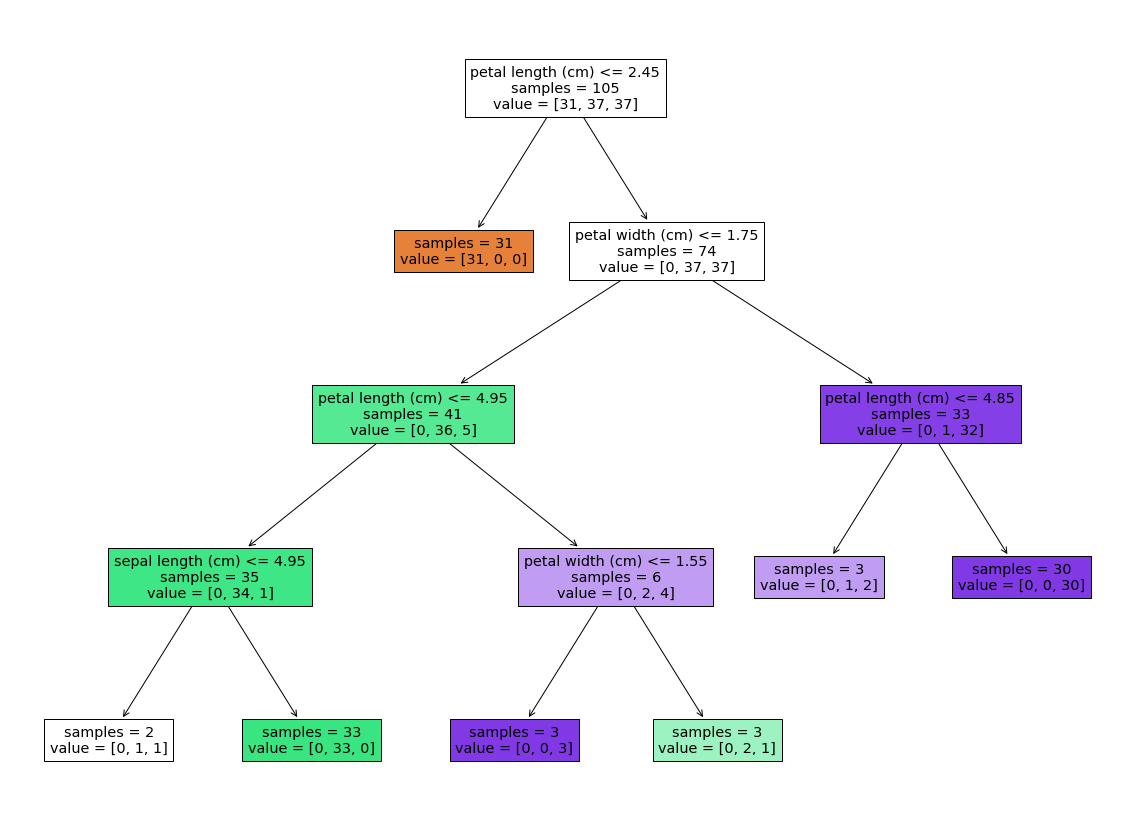

In [11]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(dtc, impurity=False, filled = True, feature_names=feature_names)
plt.show()

We have too small data so let's use `cross_validate()` function from `sklearn.model_selection` module to use all data for training.Let's use k-fold cross-validation where k=3:

In [13]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier(random_state=3)

cv = cross_validate(model, X, y, cv=3)
print("test scores: ", cv['test_score'])
print("mean of test score: ", cv['test_score'].mean())

test scores:  [0.98 0.94 1.  ]
mean of test score:  0.9733333333333333


### regression

Let's use diabetics dataset where we have $442$ data point with $10$ features, features are scalized and target value is in range of  $[25, 346]$. Use this for random forest and gradient boosting models and compare the results:


In [14]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let's train regression tree and print MSE and $R^2$:

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dtr = DecisionTreeRegressor( criterion='friedman_mse', max_depth=20, min_samples_leaf=5, max_leaf_nodes=20)

dtr.fit(X_train, y_train)

train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)


print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(dtr.score(X_train, y_train), dtr.score(X_test, y_test)))

Train MSE: 1974.8069453612572
Test MSE: 3532.580450921689
Train score: 0.6788034449329594
Test score: 0.3456133650135631


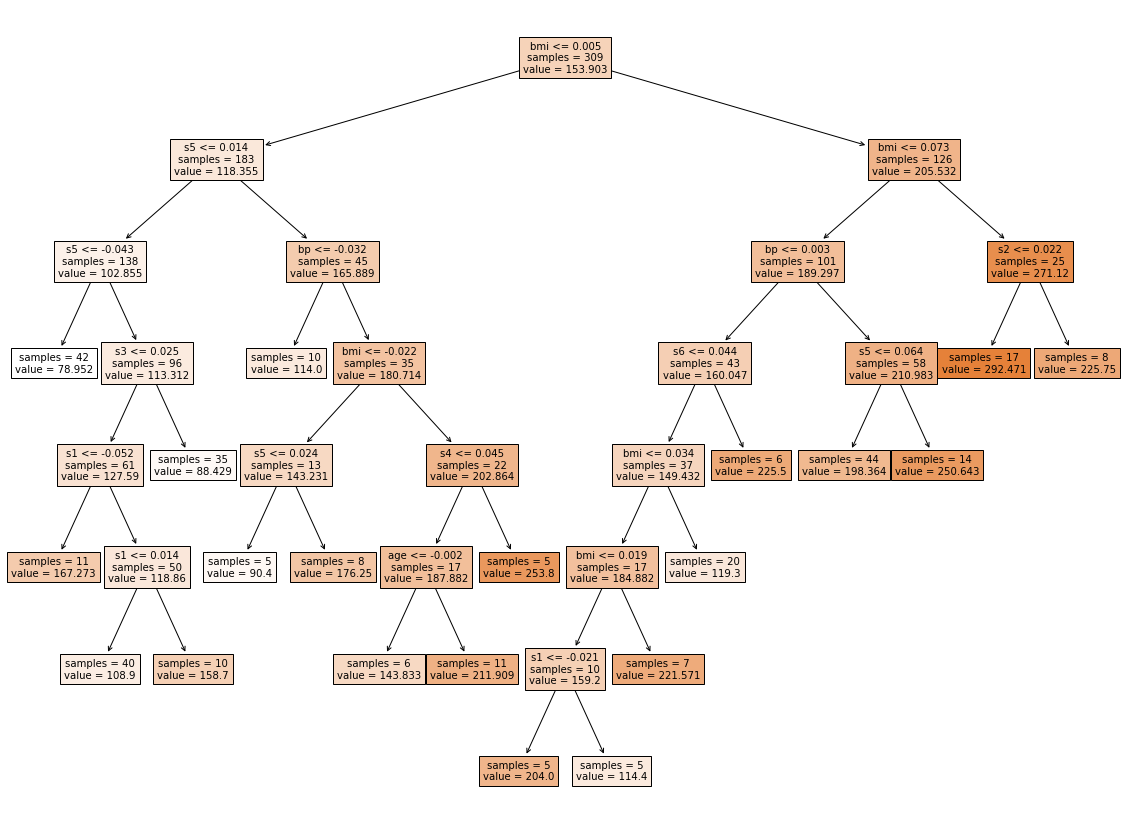

In [17]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(dtr, impurity=False, filled=True, feature_names=feature_names)
plt.show()

Trying different parameters needs too much time so let's use `GridSearchCV` function from `sklearn.model_selection` to choose the best parameter. Fill `param_grid` with parameters that we want to be chosen by gridsearchcv

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["squared_error", "absolute_error", "friedman_mse"],
              "max_depth": [5, 10, 15, 20, 30],
              "min_samples_leaf": [2, 5, 8, 15],
              "max_leaf_nodes": [20, 50, 100],
              }

In [23]:
grid_cv = GridSearchCV(dtr, param_grid, cv=5)
grid_cv.fit(X_train,y_train)

grid_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 15}

In [24]:
train_pred = grid_cv.predict(X_train)
test_pred = grid_cv.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(grid_cv.score(X_train, y_train), grid_cv.score(X_test, y_test)))

Train MSE: 2597.5506439801834
Test MSE: 3270.919352141919
Train score: 0.577516009644182
Test score: 0.394084313748127


## Random Forest 

Diabetics dataset again

In [26]:

from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfr = RandomForestRegressor(max_depth=3, n_estimators=50, criterion='squared_error', random_state=42)
rfr.fit(X_train,y_train, )

train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(rfr.score(X_train, y_train), rfr.score(X_test, y_test)))

Train MSE: 2575.1416580717505
Test MSE: 2749.744543588186
Train score: 0.5811607654484097
Test score: 0.4906284219283651


let's plot first tree:

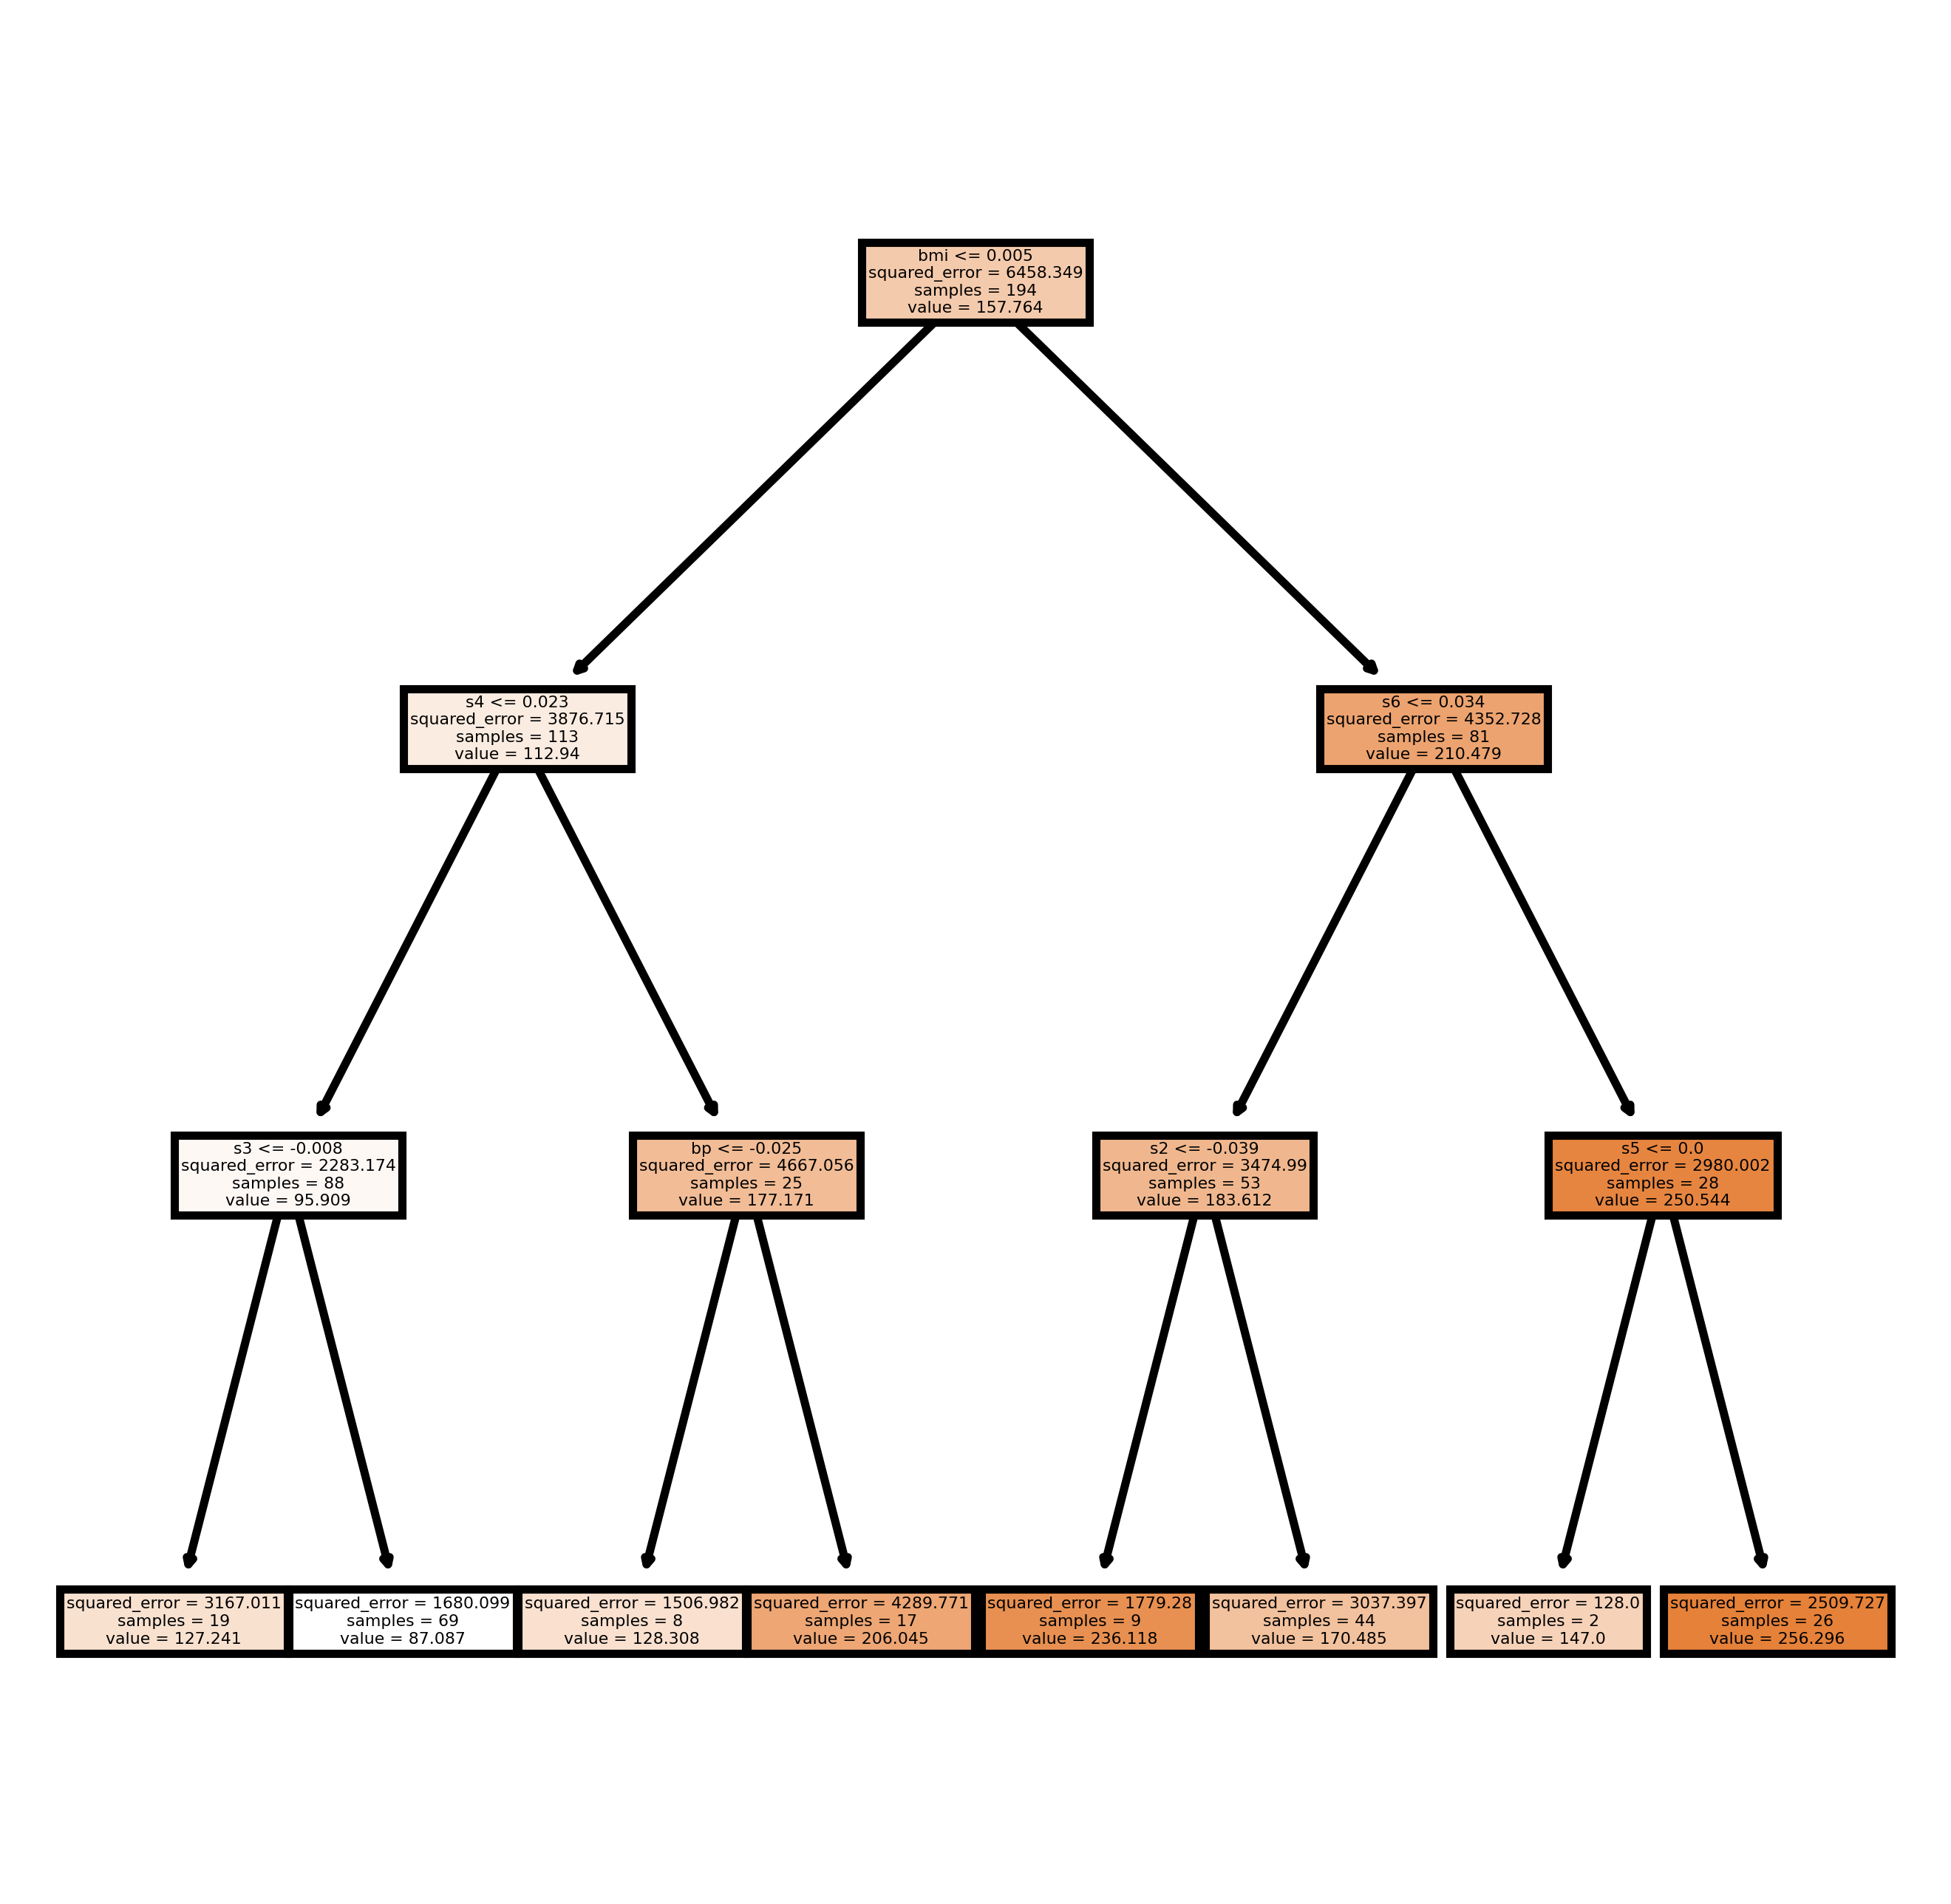

In [27]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=800)
tree.plot_tree(rfr.estimators_[0], feature_names=diabetes.feature_names, filled=True)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            #   "criterion": ["mse", "mae", "friedman_mse"],
            "max_depth": [3, 5, 10],
            'min_samples_leaf': [1, 2, 4], 
            "n_estimators": [100, 300, 500],
            #   "max_leaf_nodes": [ 20, 50, 100],

              }
            
rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid, cv=3)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)


{'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 300}


In [29]:
train_pred = grid_cv.predict(X_train)
test_pred = grid_cv.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)


print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(grid_cv.score(X_train, y_train), grid_cv.score(X_test, y_test)))

Train MSE: 2544.9033091623137
Test MSE: 2751.392876190296
Train score: 0.5860789441713681
Test score: 0.49032307946275977


## Gradient Boosting / XGBoost



Let's train Gradient Boosting and XGBoost using diabet dataset

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss='huber', n_estimators=500, learning_rate=0.05, 
                                max_leaf_nodes=5, random_state=42,  min_samples_leaf=2, 
                                max_depth=6, 
                                n_iter_no_change = 10)

gbr.fit(X_train, y_train)

train_pred = gbr.predict(X_train)
test_pred = gbr.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(gbr.score(X_train, y_train), gbr.score(X_test, y_test)))


Train MSE: 1892.7206300058967
Test MSE: 2617.560318690136
Train score: 0.692154543262961
Test score: 0.5151146555275905


In [35]:
%%time
from xgboost import XGBRegressor

XGBR = XGBRegressor(max_depth=5, learning_rate=0.05, n_estimators=15000, objective='reg:squarederror', 
                    booster='gbtree', n_jobs=-1, gamma=1, eta=0.4,  min_child_weight=2, 
                    max_delta_step=2, subsample=0.8, random_state=42, importance_type='gain',)

eval_set = [(X_train, y_train), (X_test, y_test)]

eval_metrics = ['mae', 'rmse']

XGBR.fit(X_train, y_train, early_stopping_rounds=50, eval_metric=eval_metrics, eval_set=eval_set, verbose=False)

results = XGBR.evals_result()

train_pred = XGBR.predict(X_train)
test_pred = XGBR.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print('Train MSE: {}\nTest MSE: {}'.format(train_mse, test_mse))
print('Train score: {}\nTest score: {}'.format(XGBR.score(X_train, y_train), XGBR.score(X_test, y_test)))

Train MSE: 842.021684786911
Test MSE: 2981.9723010547427
Train score: 0.8630476436795059
Test score: 0.44760980059184696
CPU times: user 19 s, sys: 154 ms, total: 19.2 s
Wall time: 11.6 s
